## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
! git clone https://github.com/ds3001f25/clustering_assignment.git

Cloning into 'clustering_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 221.98 KiB | 4.83 MiB/s, done.


In [3]:
#I would like to acknowledge use of CHATGPT and Generative AI as aid in competing this assignment. It helped me brainstorm code to complete the necessary tasks to fulfill assignment requirements.

#1 Creating the datasets
import numpy as np
import pandas as pd

def createData(noise,N=50):
  np.random.seed(100) # Set the seed for replicability
  # Generate (x1,x2,g) triples:
  X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
  X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
  X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
  # Concatenate into one data frame
  gdf1=pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
  gdf2=pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
  gdf3=pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
  df=pd.concat([gdf1,gdf2,gdf3],axis=0)
  return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

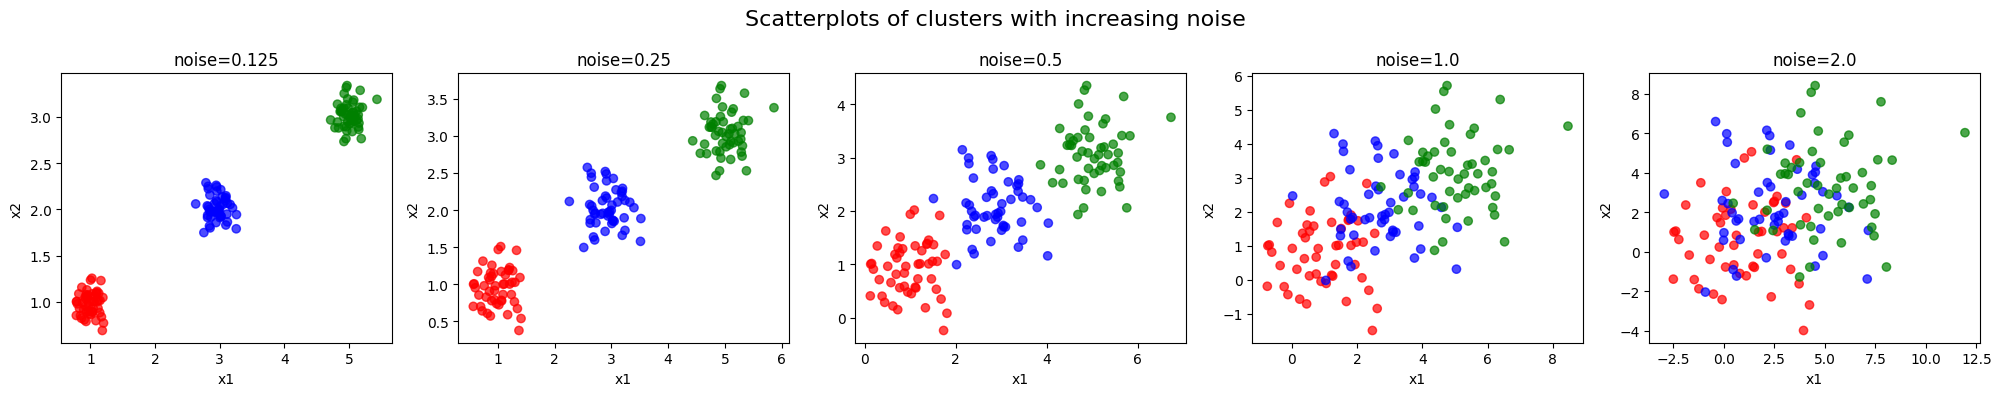

In [4]:
#2 Creating Scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#Creating Dataset dictionary
datasets = {
    "noise=0.125": df0_125,
    "noise=0.25": df0_25,
    "noise=0.5": df0_5,
    "noise=1.0": df1_0,
    "noise=2.0": df2_0
}

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, (title, df) in zip(axes, datasets.items()):
    colors = df['group'].map({'a': 'red', 'b': 'blue', 'c': 'green'})
    ax.scatter(df['x1'], df['x2'], c=colors, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
plt.suptitle("Scatterplots of clusters with increasing noise", fontsize=16)
plt.tight_layout()
plt.show()


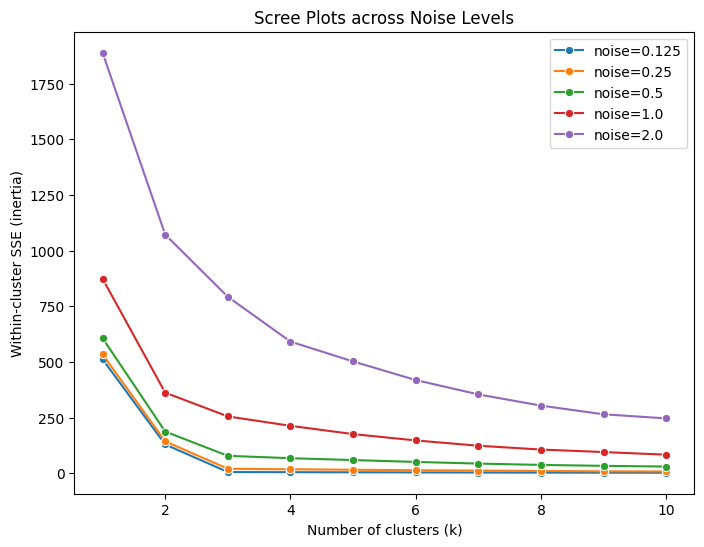

In [ ]:
#3 Scree Plots
k_bar = 10
plt.figure(figsize=(8, 6))

for title, df in datasets.items():
    X = df[['x1','x2']].values
    SSE = []
    for k in range(1, k_bar+1):  # start at k=1
        model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        SSE.append(model.inertia_)
    sns.lineplot(x=np.arange(1, k_bar+1), y=SSE, marker="o", label=title)

plt.title("Scree Plots across Noise Levels")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster SSE (inertia)")
plt.legend()
plt.show()

##3- Scree Plots

As the level of noise  the SSE increases and makes points more spread out. This results in higher slopes at higher noise which makes it harder to determine a "elbow" or suitable level of K.

Lower noises ( .125 , .25, .5 ) in the scree plot flatten after K=3, implying that this is the elbow  and it is a suitable K level.The marginal benefit of an additonal cluster is small, but the marginal benefit of an additional cluster at k-1 is large, which further reinforces my pick of K=3.

#4-Scree Plot Intuition

The tuition behind scree plots and elbows is that we are looking for the balance of K level that ensures a precise fit of the model. For example, we can observe in the scree plot above that the first added K+1 drops SSE substantially, but as we add more and mores K clusters we begin to see diminishing utility. Our goal is to find the right mix of noise and fit, so that we can ground our model in realism. In the scree plot that I made, this point is at K=3 because we can see in the slope that the adding of K beyond three makes little difference, but the addition to K=3 is very substantial.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [25]:
#1-Loading 2022 Election Data
df=pd.read_csv('clustering_assignment/data/2022 election cycle fundraising.csv')
df.head()

#Creating a cleaning function to remove strings like "$" and ",", and to just retain the numerical value
def clean_money(x):
    if pd.isna(x):   # keep NaN
        return None
    x = str(x).replace("$", "").replace(",", "").strip()
    if x.startswith("(") and x.endswith(")"):   # handle (12345) as -12345
        x = "-" + x[1:-1]
    return pd.to_numeric(x, errors="coerce")

# Cleaning the money columns
money_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
df[money_cols] = df[money_cols].applymap(clean_money)

#Testing Outcome
print(df[money_cols].describe())

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Raised_norm,Spent_norm,cluster
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0,0.103512,0.098074,4
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0,0.040686,0.016371,7
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0,0.254404,0.183753,2
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0,0.029527,0.015449,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0,0.034148,0.021915,7


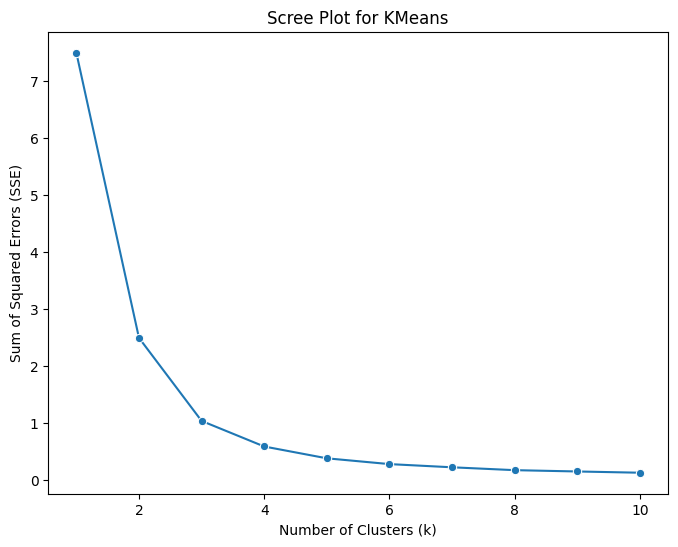

In [43]:
#2-MaxMin and Scree plot
from sklearn.preprocessing import MinMaxScaler

# Max–Min Scaling
scaler = MinMaxScaler()
df[['Raised_norm', 'Spent_norm']] = scaler.fit_transform(df[['Raised', 'Spent']])

# Features for clustering
X = df[['Raised_norm', 'Spent_norm']]

# Scree plot values
k_bar = 10
SSE = []
for k in range(1, k_bar+1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    SSE.append(model.inertia_)

# Plot scree plot
plt.figure(figsize=(8,6))
sns.lineplot(x=range(1, k_bar+1), y=SSE, marker="o")
plt.title("Scree Plot for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

#2-Scree Plot Elbow
We can see in the scree plot that the elbow lies at 4, where k+1 isn't optimal but the change from k-1 is substantial. This is the optimal level for k.

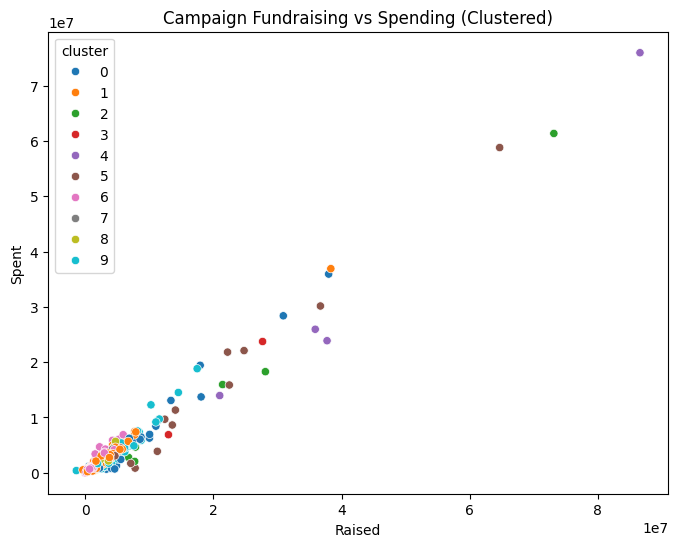

In [41]:
#2- Adding Clusters to the Dataset and Making a Scatterplot
k_star = 4
kmeans = KMeans(n_clusters=k_star, max_iter=300, n_init=10, random_state=0)
model=model.fit(X)
cluster = model.predict(X)
df['cluster'] = cluster
plt.figure(figsize=(8,6))


sns.scatterplot(
    data=df,
    x="Raised", y="Spent",
    hue="cluster",
    palette="tab10"
)
plt.title("Campaign Fundraising vs Spending (Clustered)")
plt.show()

In [39]:
#2- Seeing candiates in smallest clusters
cluster_sizes = df['cluster'].value_counts()
print("Cluster sizes:\n", cluster_sizes)

# Get the two smallest clusters
smallest_clusters = cluster_sizes.index[-2:]  # last two in sorted order

# Subset to just those clusters
smallest_df = df[df['cluster'].isin(smallest_clusters)]

# Show candidate names + raised/spent + cluster
print(
    smallest_df[['Member', 'Raised', 'Spent', 'cluster']]
          .sort_values(['cluster', 'Raised'], ascending=[True, True])
)

Cluster sizes:
 cluster
0    206
7    165
5     85
4     51
9     11
2      9
8      5
1      2
3      2
6      1
Name: count, dtype: int64
              Member    Raised     Spent  cluster
523      Val Demings  64682883  58806664        3
340       Mark Kelly  73140886  61357281        3
417  Raphael Warnock  86581469  75959810        6


#2-

The canidates present in the smallest cluster are Val Demings, Mark Kelly, and Raphael Warnock.

Demings lost to Marco Rubio, who won 56.5 percent of the vote compared to Demings' 42.4 percent.

Mark Kelly won the vote with 51.4 percent of the vote against opponent Blake Masters, who wont 46.5% of the vote.

Raphael Warnock narrowly won the 2022 race with 49.44% of the vote against Herschel Walker who won 48.49% of the vote.

These races were all in high profile swing states and were highly constested. These races werew amont the leaders in campgaign spending.

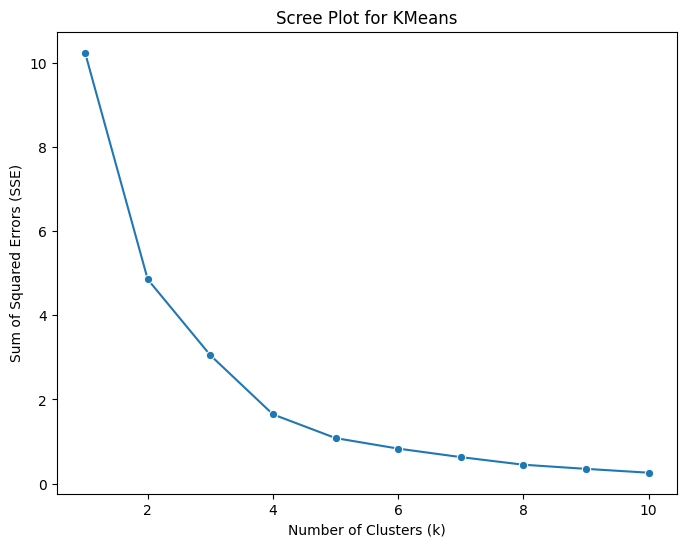

In [37]:
#3-MaxMin and Scree plot for Cash on Hand and Debts
from sklearn.preprocessing import MinMaxScaler

# Max–Min Scaling
scaler = MinMaxScaler()
df[['Cash_norm', 'Debt_norm']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])

# Features for clustering
X1 = df[['Cash_norm', 'Debt_norm']]

# Scree plot values
k_bar = 10
SSE = []
for k in range(1, k_bar+1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X1)
    SSE.append(model.inertia_)

# Plot scree plot
plt.figure(figsize=(8,6))
sns.lineplot(x=range(1, k_bar+1), y=SSE, marker="o")
plt.title("Scree Plot for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

#3-Scree Plot

This is a little bit harder to determine a optimal k level because changes are more drastic. I would say that the optimal level is still 4 however, because the marginal benefit of the next K is so much less than the K prior.

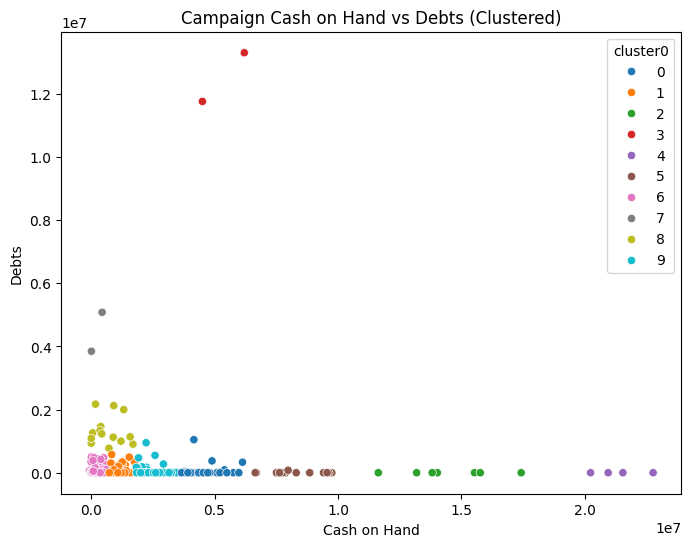

In [36]:
#3- Adding Clusters to the Dataset and Making a Scatterplot
k_star = 4
kmeans = KMeans(n_clusters=k_star, max_iter=300, n_init=10, random_state=0)
model=model.fit(X1)
cluster = model.predict(X1)
df['cluster0'] = cluster
plt.figure(figsize=(8,6))


sns.scatterplot(
    data=df,
    x="Cash on Hand", y="Debts",
    hue="cluster0",
    palette="tab10"
)
plt.title("Campaign Cash on Hand vs Debts (Clustered)")
plt.show()

In [35]:
#3- Seeing candiates in smallest clusters
cluster_sizes = df['cluster0'].value_counts()
print("Cluster sizes:\n", cluster_sizes)

# Get the two smallest clusters
smallest_clusters = cluster_sizes.index[-2:]  # last two in sorted order

# Subset to just those clusters
smallest_df = df[df['cluster0'].isin(smallest_clusters)]

# Show candidate names + raised/spent + cluster
print(
    smallest_df[['Member', 'Cash on Hand', 'Debts', 'cluster0']]
          .sort_values(['cluster0', 'Cash on Hand'], ascending=[True, True]))

Cluster sizes:
 cluster0
6    200
1    170
9     91
0     32
5     15
8     14
2      7
4      4
7      2
3      2
Name: count, dtype: int64
                         Member  Cash on Hand     Debts  cluster0
442                 Ron Johnson       4508581  11759857         3
133                 David Trone       6206371  13302000         3
463  Sheila Cherfilus-McCormick         13498   3848131         7
123                Darrell Issa        447473   5081387         7


#3-
We can see that the canidates in the smallest clusters have debts that heavily outweigh their cash on hand. Ron Johnson and David Trone accumlated much more debt than Cherfilus-McCormick  and Darrell Issa.

Trone and Johnson had close races in highly contested swing states. Johnson won a senate race and Trone won a house race.

Sheila Cherfilus-McCormick won her race with 79% of the vote.

Darrell Issa won his race with 62% of the vote

Cluster 7 is meant to represent smaller races that were lopsided, with each canidate holding a large amount of debt,

Cluster 3 is meant to represent larger, more contested races with a ton of campgaign spending and debt.

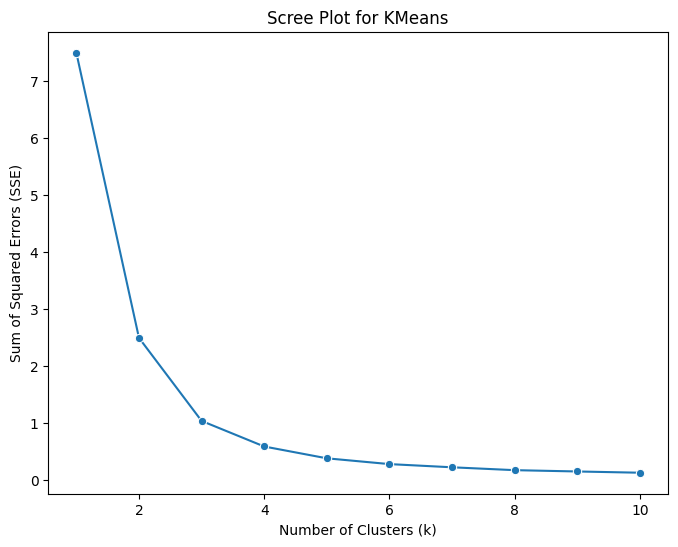

In [49]:
#4- All 4 Numeric Variables

# Select numeric variables
X2 = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']]

# Scale them
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Scree plot values
k_bar = 10
SSE = []
for k in range(1, k_bar+1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_scaled)
    SSE.append(model.inertia_)

# Plot scree plot
plt.figure(figsize=(8,6))
sns.lineplot(x=range(1, k_bar+1), y=SSE, marker="o")
plt.title("Scree Plot for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

#4-
 This scree plot is very steep and it is very difficult to determmine a suitable K level. This is most likely because there is noise from examining all 4 numeric variables at once. For the sake of continuity, I am going to pick K=4 as the optimal amount of clusters.

In [51]:
#  k=4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
df['cluster_all'] = kmeans.fit_predict(X_scaled)

# Inspect cluster centers
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=X.columns
)
print(centroids)

# Check size of clusters
print(df['cluster_all'].value_counts())

# Smallest clusters
small_clusters = df[df['cluster_all'].isin([1, 3])]

# Show  details
small_clusters = small_clusters[['Member', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'cluster_all']]
print(small_clusters.sort_values('cluster_all'))

   Raised_norm  Spent_norm
0     0.098266    0.075397
1     0.334620    0.308162
2     0.034407    0.016553
3     0.866091    0.860647
cluster_all
2    442
0     77
1     15
3      3
Name: count, dtype: int64
                     Member    Raised     Spent  Cash on Hand     Debts  \
2               Adam Schiff  20993041  13957854      20942888         0   
87   Catherine Cortez Masto  37993811  35928936       5089745         0   
89            Chuck Schumer  35899966  25944350      20231213         0   
261            John Kennedy  28119082  18276565      15530074         0   
290            Katie Porter  21441693  15946876      15762568         0   
298          Kevin McCarthy  24791538  22086344       7507326         0   
326           Maggie Hassan  30914830  28380992       4813508         0   
328             Marco Rubio  36709285  30153111       9631856         0   
390            Nancy Pelosi  22216583  21814643       6701313         0   
414               Rand Paul  22490627  15

#4-
We can see that Cluster 1 holds some of the biggest names in the house and senate, people who were speaker of the house and senate majority leader. These are high profile fundraisers who don't hold any debts.

Cluster 3 holds the canidates who spent the most and raised the most. These canidates are typically in highly important races in key swing state seats.

#5-

Yes the k-MC algorithm did find very useful trends. The algorithm would sort candiates into batches based on their financials that would take much longer to do manually. It also found the optimal level of clustering via scree plot which ensured that we found a optimal fit for modeling among the various different types of campaigns. Ultimately, such trends couldn't have been discovered without the k-MC algorithm. The algorithm was the focal point for identifying key details and insights for the 2022 election cycle.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?